In [1]:
%pylab inline
import io
import h5py 
import pandas as pd
import scipy as sp
import numpy as np
from PIL import Image
from fractions import Fraction
from scipy.stats import norm, chisquare, chi2_contingency, chi2
from scipy import optimize 
from scipy.optimize import curve_fit,least_squares
from lmfit.models import GaussianModel


Populating the interactive namespace from numpy and matplotlib


In [2]:
Angles = 22
dfs = []
fileName = [[] for i in range((Angles))]
for i in range(Angles):
    prefix1 = 'LXe_Angle_nt_'    
    csv ='.csv'
    i=i  
    fileName[i].append(f'{prefix1}{i}{csv}')
    dfs.append(pd.read_csv(fileName[i][0], sep=',',header=None, skiprows=range(0,7),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons')))  

In [3]:
DataZ = np.zeros((len(dfs),7))
for i in range(len(dfs)):
        DataZ[i,0]=dfs[i]['Energy Deposited'].mean()
        DataZ[i,1]=dfs[i]['SiPM Hits'].mean()
        DataZ[i,2]=dfs[i]['Photons'].mean()
        DataZ[i,3]=DataZ[i,1]/DataZ[i,2]
        DataZ[i,4]= len(dfs[i])
        DataZ[i,5]= dfs[i].sum()[1]
        DataZ[i,6]= dfs[i].sum()[2]
        
data = DataZ
# data[i,k] # i = shape,  k = column of data
# k=0 -> Average Energy Deposit
# k=1 -> Average SiPM Hits
# k=2 -> Average photons
# k=3 -> Average SiPM hits / photons
# k=4 -> total scint hits
# k=5 -> total SiPM hits
# k=6 -> total photons    
    

In [11]:
DataZ[21,3]

0.014550000139264104

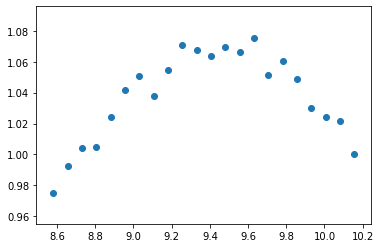

In [4]:
x = np.arange(0,0.1*(Angles-0.001),0.1)
trap_h = x
V = 325/32 - 0.75*x
V_ = V/V[0]
angles = arctan(8*x/3)*180/pi
kl = 5
scatter(V,data[:,kl]/data[0,kl]*V_)

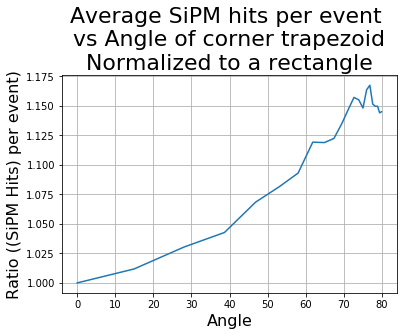

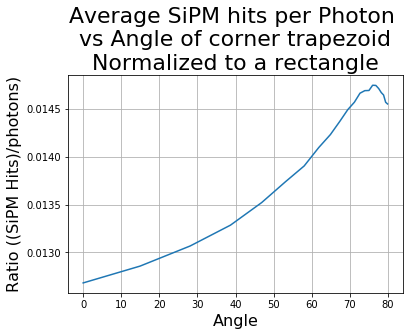

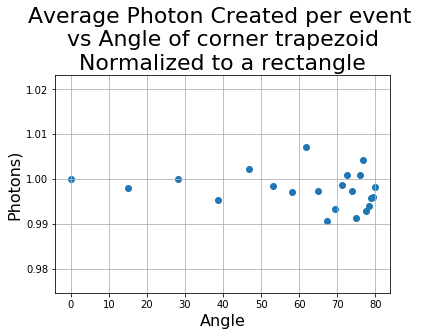

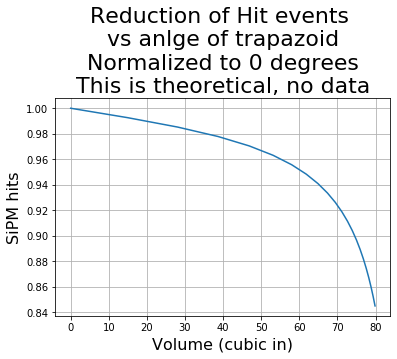

In [12]:
plt.grid()
plt.title('Average SiPM hits per event \nvs Angle of corner trapezoid\nNormalized to a rectangle',fontsize=22)
plt.xlabel('Angle',fontsize=16)
plt.ylabel('Ratio ((SiPM Hits) per event)',fontsize=16)
kl = 1
plot(angles,data[:,kl]/data[0,kl])
show()

plt.grid()
plt.title('Average SiPM hits per Photon \nvs Angle of corner trapezoid\nNormalized to a rectangle',fontsize=22)
plt.xlabel('Angle',fontsize=16)
plt.ylabel('Ratio ((SiPM Hits)/photons)',fontsize=16)
kl = 3
plot(angles,data[:,kl]/data[0,kl])
show()

plt.grid()
plt.title('Average Photon Created per event \nvs Angle of corner trapezoid\nNormalized to a rectangle',fontsize=22)
plt.xlabel('Angle',fontsize=16)
plt.ylabel('Photons)',fontsize=16)
kl = 2
scatter(angles,data[:,kl]/data[0,kl])
show()
plt.grid()
plt.title('Reduction of Hit events \nvs anlge of trapazoid\nNormalized to 0 degrees\nThis is theoretical, no data',fontsize=22)
plt.xlabel('Volume (cubic in)',fontsize=16)
plt.ylabel('SiPM hits',fontsize=16)
kl = 5
plot(angles,V_)
show()

Since the source is interacting in the center away from the missing volume, the number of photons created is staying relativly the same.  In an attempt to account got the missing volume.  I will multiple the ratio of reduced volume and te volume of the retangle with the total number of SiPM hits.  I believe the number of scintolator hits is proportional to the volume.  A Volume of 0.5 would have half the hits of a volume 1.0.  Along this line, I will mutiply the total number of SiPM by the volume ratio to get a "corrected" value

In [346]:
datu = data[:,kl]/data[0,kl]*V_

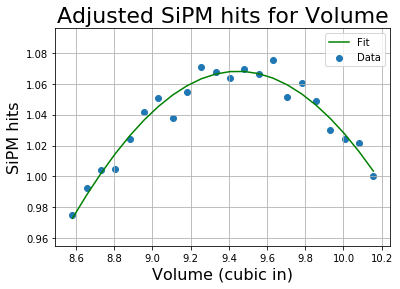

In [347]:
plt.grid()
plt.title('Adjusted SiPM hits for Volume',fontsize=22)
plt.xlabel('Volume (cubic in)',fontsize=16)
plt.ylabel('SiPM hits',fontsize=16)
kl = 5
datu = data[:,kl]/data[0,kl]*V_
scatter(V,datu,label='Data')
v = np.flip(V)
da = np.flip(datu)
x,y = v,da
def gaussian(x, A, nu, sigma):  
    return (A / (sqrt(2*pi) * sigma)) * exp(-(x-nu)**2 / (2*sigma**2))   
p0 = [1,9.4,1]
popt, pcov = curve_fit(gaussian, x, y,p0)
x_fit = x
y_fit = gaussian(x, *popt)
plot(x,y_fit,label='Fit',c='g')
# plot(x,y_fit)
plt.legend()
show()


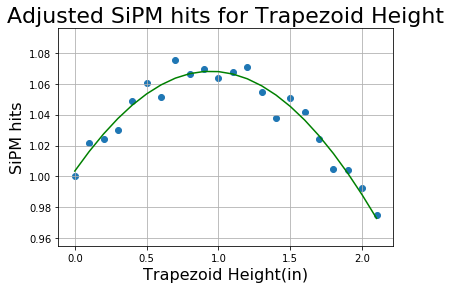

0.945 inch is the optimal trapezoid height


In [348]:
plt.grid()
plt.title('Adjusted SiPM hits for Trapezoid Height',fontsize=22)
plt.xlabel('Trapezoid Height(in)',fontsize=16)
plt.ylabel('SiPM hits',fontsize=16)
x,y = trap_h,datu
def gaussian(x, A, nu, sigma):  
    return (A / (sqrt(2*pi) * sigma)) * exp(-(x-nu)**2 / (2*sigma**2))   
p0 = [1,1.5,1]
popt, pcov = curve_fit(gaussian, x, y,p0)
x_fit = x
y_fit = gaussian(x, *popt)
scatter(x,y)
plot(x,y_fit,label='Fit',c='g')
show()
print('{:.3f} inch is the optimal trapezoid height'.format(popt[1]))

Final geometry:



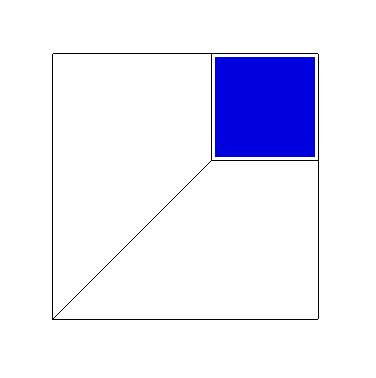

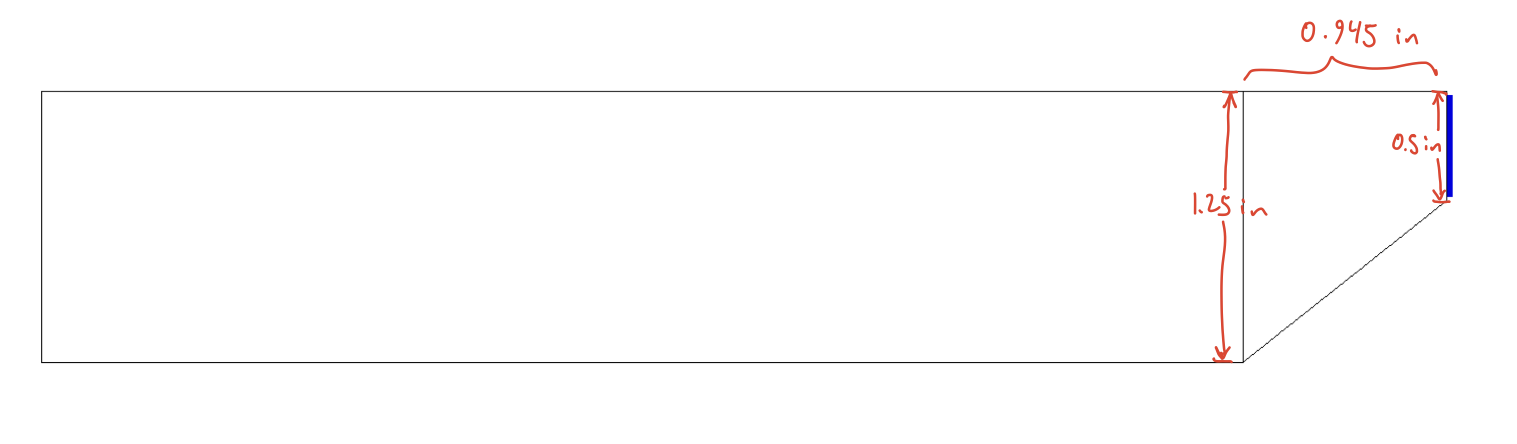